# Decision Tree Classifier Models

This notebook is a special edition of our project. It simply allows us to illustrate the decision tree classifier model that we implemented.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, f1_score, accuracy_score, recall_score, precision_score
from sklearn.svm import SVC
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import BaggingClassifier, VotingClassifier
import pandas as pd
import ast

### Importation and Preparation of dataset

In [17]:
df = pd.read_csv('merged_data.csv', sep = ';')
print(df.columns)

df = df.drop(columns=['Unnamed: 0'])
df['Genres']

Index(['Unnamed: 0', 'UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Title', 'Genres', 'Year'],
      dtype='object')


0                                             ['Drama']
1                ['Animation', "Children's", 'Musical']
2                                ['Musical', 'Romance']
3                                             ['Drama']
4                 ['Animation', "Children's", 'Comedy']
                               ...                     
1000204                                      ['Comedy']
1000205                     ['Drama', 'Romance', 'War']
1000206                             ['Comedy', 'Drama']
1000207                                       ['Drama']
1000208    ["Children's", 'Drama', 'Fantasy', 'Sci-Fi']
Name: Genres, Length: 1000209, dtype: object

The dataset is the result of the merge from our three data files after cleaning. It has informations on the movies and the users. The columns includes the characteristics of users like age, gender, etc. The column Genre has a list of genre for each movie, so it's necessary to treat this columns

In [18]:
print(df.isnull().sum())
print(df['Year'].median())
moyenne_annee = df['Year'].median()
df['Year'].fillna(moyenne_annee, inplace=True)

UserID          0
MovieID         0
Rating          0
Timestamp       0
Gender          0
Age             0
Occupation      0
Zip-code        0
Title           0
Genres          0
Year          150
dtype: int64
1992.0


C:\Users\ML6616\AppData\Local\Temp\ipykernel_19200\3777460609.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(moyenne_annee, inplace=True)


The columns *Year* has missing values. For handle this problem, we use median imputation to replace the missin values. This allow to maitain temporal consistency of the dataset. 

In [19]:
df.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
Year          0
dtype: int64

In [20]:
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x))
df['Genres'] = df['Genres'].apply(lambda x: '|'.join(x))
genres_encodage = df['Genres'].str.get_dummies()
print(genres_encodage)
len(genres_encodage)
df = pd.concat([df, genres_encodage], axis=1)

df['Gender'] = df['Gender'].map({'M':1, 'F':0})

          Miami Beach (1988)Comedy  Action  Adventure  Animation  Children's  \
0                                0       0          0          0           0   
1                                0       0          0          1           1   
2                                0       0          0          0           0   
3                                0       0          0          0           0   
4                                0       0          0          1           1   
...                            ...     ...        ...        ...         ...   
1000204                          0       0          0          0           0   
1000205                          0       0          0          0           0   
1000206                          0       0          0          0           0   
1000207                          0       0          0          0           0   
1000208                          0       0          0          0           1   

         Comedy  Crime  Documentary  Dr

*Encoding of categorical variables*

### Creation of model 

In [21]:
X = df.drop(columns=['Rating', 'Title', 'Zip-code', 'Genres'])
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = DecisionTreeClassifier(random_state=42)

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [15, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

We create a GridSearchCV object to find the best hyperparameters for the Decision Tree model.

In [24]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,        
    scoring='accuracy', 
    refit=True,         
    verbose=1        
)

In [25]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [15, 25, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [26]:
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best accuracy score (mean) :", grid_search.best_score_)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy score (mean) : 0.3806130452715107
Test Accuracy: 0.3875686105917757


Thanks to the grid search, we have improved the accuracy on the test set.
We have a weak performance gain, which suggests that the tree decision model wasn't adapted to our system of recommandation

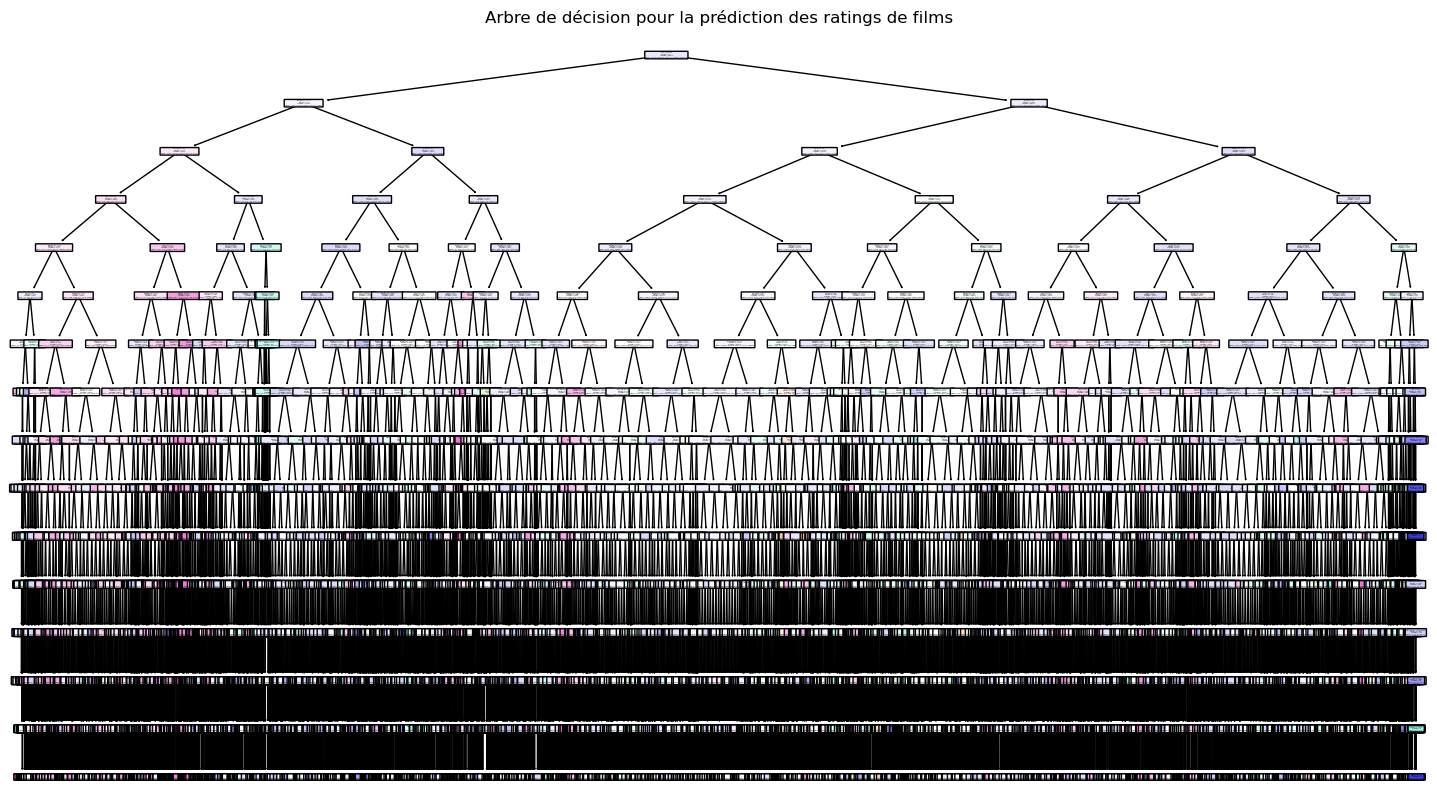

In [ ]:
plt.figure(figsize=(18,10))
tree.plot_tree(
    best_model,
    feature_names=X_train.columns.tolist(),  
    class_names=[str(i) for i in sorted(y_train.unique())], 
    filled=True,
    rounded=True
)
plt.title('Tree decision classifier for Movie Rating Prediction')
plt.show()

Moreover, the decision Classifier is maybe not adapted by looking at this unreadable graph

In conclusion, although the Decision Tree Classifier provides an interpretable baseline, its limited performance suggests that an effective recommendation system requires more sophisticated approaches like **KNN**.